In [1]:
from random import random
from sys import platform
import clr
import numpy as np
import matplotlib.pyplot as plt
import timeit
from jmetal.algorithm.singleobjective import GeneticAlgorithm
from jmetal.operator import SBXCrossover, PolynomialMutation, RandomSolutionSelection
from jmetal.util.termination_criterion import StoppingByKeyboard
from jmetal.util.observer import PrintObjectivesObserver
from jmetal.core.quality_indicator import GenerationalDistance
from jmetal.core.problem import FloatProblem, FloatSolution, OnTheFlyFloatProblem
from jmetal.util.solution import (
    get_non_dominated_solutions,
    print_function_values_to_screen,
    print_variables_to_screen,
)

if platform == "win32":
    import pythoncom

    pythoncom.CoInitialize()
    PATH = "c:\\Users\\Volkan\\AppData\\Local\\DWSIM8\\"
elif platform == "linux":
    PATH = "/usr/local/lib/dwsim/"


clr.AddReference(PATH + "DWSIM.Automation.dll")
clr.AddReference(PATH + "DWSIM.Interfaces.dll")
clr.AddReference(PATH + "DWSIM.UnitOperations.dll")

from DWSIM.Automation import Automation2
from DWSIM.Interfaces.Enums import PropertyType

fs = Automation2()
sim = fs.LoadFlowsheet("orc6.dwxmz")

def print_properties(uo_name:str):
    global sim
    a = sim.GetFlowsheetSimulationObject(uo_name)
    for p in a.GetProperties(PropertyType.ALL):
        print(f"{p}: {a.GetPropertyValue(p)}")

0.65: 1.0
0.7000000000000001: 1.0
0.7500000000000001: 0.974625215024777
0.8000000000000002: 0.9601965695255826
0.8500000000000002: 0.8562677237526014
Elapsed time: -0.0236416999832727


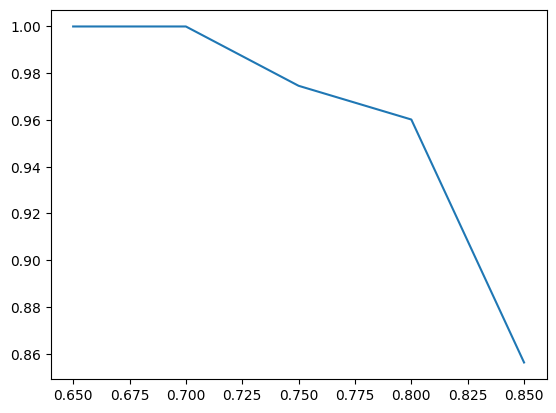

In [28]:
splitter = sim.GetFlowsheetSimulationObject("SPLITTER")
orc10 = sim.GetFlowsheetSimulationObject("ORC10")

sr = np.arange(0.65, .86, 0.05)
x = []
start = timeit.timeit()
for sri in sr:
    splitter.SetPropertyValue("SR1", float(sri))
    fs.CalculateFlowsheet2(sim)
    xi = orc10.GetPropertyValue("PROP_MS_27")
    print(f"{sri}: {xi}")
    x.append(xi)

stop = timeit.timeit()

print(f"Elapsed time: {stop-start}")
    
plt.plot(sr, x)
plt.show()

In [16]:
lpt = sim.GetFlowsheetSimulationObject("LP TURBINE")
wthp = sim.GetFlowsheetSimulationObject("Wthp")
wtlp = sim.GetFlowsheetSimulationObject("Wtlp")
wp = sim.GetFlowsheetSimulationObject("Wp")
orc11a = sim.GetFlowsheetSimulationObject("ORC11a")
po = np.linspace(400e3,300e3,10)

import time
start = time.time()
for p in po:
    lpt.SetPropertyValue("PROP_TU_4", float(p))
    fs.CalculateFlowsheet2(sim)
    wtot = wtlp.GetPropertyValue("PROP_ES_0")+wthp.GetPropertyValue("PROP_ES_0")-wp.GetPropertyValue("PROP_ES_0")
    t = orc11a.GetPropertyValue("PROP_MS_0")
    print(f"{wtot} {t}")
stop = time.time()
print(stop-start)

10750.146971757222 304.9065363062054
10925.206498307985 314.9909238797987
11129.96464941826 313.9712282013117
11340.878973892168 312.92945434794905
11558.312729439025 311.8644359023193
11782.662002811821 310.7749066207643
12014.361322562783 309.65948855886194
12253.888086584031 308.5166784340933
12501.768474116958 307.3448319376167
12758.584416474325 306.1421456663137
47.42684030532837


In [10]:
pu = np.linspace(2.7e6, 3.5e6, 9)
feed_pump = sim.GetFlowsheetSimulationObject("FEED PUMP")
lpt = sim.GetFlowsheetSimulationObject("LP TURBINE")
wthp = sim.GetFlowsheetSimulationObject("Wthp")
wtlp = sim.GetFlowsheetSimulationObject("Wtlp")
wp = sim.GetFlowsheetSimulationObject("Wp")
orc10 = sim.GetFlowsheetSimulationObject("ORC10")
f = sim.GetFlowsheetSimulationObject("f")
for p in pu:
    feed_pump.SetPropertyValue("PROP_PU_5", float(p))
    fs.CalculateFlowsheet2(sim)
    wtot = wtlp.GetPropertyValue("PROP_ES_0")+wthp.GetPropertyValue("PROP_ES_0")-wp.GetPropertyValue("PROP_ES_0")
    x1 = orc10.GetPropertyValue("PROP_MS_27")
    x2 = f.GetPropertyValue("PROP_MS_27")
    print(f"{p} {wtot} {x1} {x2}")
    

2700000.0 10704.811575924417 0.9919977185673934 1.0
2800000.0 10730.661987487105 0.965600044568663 1.0
2900000.0 10741.031136126021 0.938192469881393 1.0
3000000.0 10732.815282268042 0.9080725204656841 0.9903245221353865
3100000.0 10705.370151259076 0.8746300614099156 0.9777124027402702
3200000.0 10651.612359497594 0.8352135020313677 0.9639671032586695
3300000.0 10566.854775125525 0.7872183511793561 0.948691592931316
3400000.0 10437.411306079612 0.7246180154811622 0.9307233905181087
3500000.0 10228.033347608443 0.6326814171541694 0.9071490697030348


In [ ]:
class Problem(FloatProblem):
    def __init__(self):
        super(Problem, self).__init__()
        
        self.number_of_objectives = 1
        self.number_of_constraints = 2
        
    def evaluate(self, solution: FloatSolution)->FloatSolution:
        pass
    
    def create_solution(self)->FloatSolution:
        pass
    
    def get_name(self)